In [1]:
import pandas as pd
import geopandas as gpd

In [19]:
h_original_df = pd.read_csv(".\data\source2\VISTA\SA\H_VISTA_1220_SA1.csv")

In [22]:
h_original_df

,hhid,surveyperiod,travdow,travmonth,daytype,dwelltype,owndwell,hhsize,hhinc,visitors,...,homesa3,homesa3_name,homesa4,homesa4_name,homelga,homesubregion_asgc,homeregion_asgc,homesubregion_asgs,homeregion_asgs,homepc
0,Y12H0000101,2012-13,Monday,May,Weekday,Separate House,Fully Owned,4,1225.0,0,...,20904,Whittlesea - Wallan,209,Melbourne - North East,Whittlesea (C),MELB - Outer,MSD_31LGAs,MELB - Outer,Greater Melbourne,3082
1,Y12H0000102,2012-13,Tuesday,May,Weekday,Separate House,Being Purchased,4,1700.0,0,...,20904,Whittlesea - Wallan,209,Melbourne - North East,Whittlesea (C),MELB - Outer,MSD_31LGAs,MELB - Outer,Greater Melbourne,3082
2,Y12H0000103,2012-13,Wednesday,May,Weekday,Separate House,Being Purchased,4,1000.0,0,...,20904,Whittlesea - Wallan,209,Melbourne - North East,Whittlesea (C),MELB - Outer,MSD_31LGAs,MELB - Outer,Greater Melbourne,3082
3,Y12H0000104,2012-13,Thursday,May,Weekday,Separate House,Fully Owned,3,1875.0,0,...,20904,Whittlesea - Wallan,209,Melbourne - North East,Whittlesea (C),MELB - Outer,MSD_31LGAs,MELB - Outer,Greater Melbourne,3082
4,Y12H0000107,2012-13,Sunday,May,Weekend,Separate House,Being Purchased,3,1750.0,0,...,20904,Whittlesea - Wallan,209,Melbourne - North East,Whittlesea (C),MELB - Outer,MSD_31LGAs,MELB - Outer,Greater Melbourne,3082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30798,Y20H4001024,2019-20,Wednesday,March,Weekday,Separate House,Being Purchased,2,0.0,0,...,20302,Geelong,203,Geelong,Greater Geelong (C),Geelong,GeelongLGA,Geelong,Geelong SA4,3219
30799,Y20H4001028,2019-20,Sunday,March,Weekend,Separate House,Fully Owned,2,574.0,0,...,20302,Geelong,203,Geelong,Greater Geelong (C),Geelong,GeelongLGA,Geelong,Geelong SA4,3219
30800,Y20H4001029,2019-20,Monday,March,Weekday,Separate House,Fully Owned,2,700.0,0,...,20302,Geelong,203,Geelong,Greater Geelong (C),Geelong,GeelongLGA,Geelong,Geelong SA4,3219
30801,Y20H4001036,2019-20,Monday,March,Weekday,Separate House,Fully Owned,1,450.0,0,...,20302,Geelong,203,Geelong,Greater Geelong (C),Geelong,GeelongLGA,Geelong,Geelong SA4,3219


In [21]:
h_original_df.columns

Index(['hhid', 'surveyperiod', 'travdow', 'travmonth', 'daytype', 'dwelltype',
       'owndwell', 'hhsize', 'hhinc', 'visitors', 'aveage', 'youngest',
       'oldest', 'yearslived', 'monthslived', 'adultbikes', 'kidsbikes',
       'totalbikes', 'cars', 'fourwds', 'utes', 'vans', 'trucks', 'mbikes',
       'othervehs', 'totalvehs', 'wdhhwgt_sa3', 'wehhwgt_sa3', 'wdhhwgt_lga',
       'wehhwgt_lga', 'homesa1', 'homesa2', 'homesa2_name', 'homesa3',
       'homesa3_name', 'homesa4', 'homesa4_name', 'homelga',
       'homesubregion_asgc', 'homeregion_asgc', 'homesubregion_asgs',
       'homeregion_asgs', 'homepc'],
      dtype='object')

In [9]:
gdf = gpd.read_file("./data/source2/CENSUS/G01_VIC_GDA2020.gpkg", layer="G01_SA2_2021_VIC")
df = pd.read_csv("./generate_PSim_input/data/H_sample.csv")
df["SA2"] = df["SA2"].astype("float")
gdf["SA2_CODE_2021"] = gdf["SA2_CODE_2021"].astype("float")

# Process the VISTA to match with LG
# df['homeLGA'] = df['homeLGA'].str.replace(r"\(.*\)","", regex=True).str.replace(" ", "")
# gdf['LGA_NAME_2021'] = gdf['LGA_NAME_2021'].str.replace(r"\(.*\)","", regex=True).str.replace(" ", "")
count_vista = dict(df['SA2'].value_counts())

# I checked: all of the value in VISTA match with the one in CENSUS
t = list(gdf['SA2_CODE_2021'])
for a in count_vista:
    if a not in t:
        print(a)

# gdf["VISTA_count"] = gdf['SA2_CODE_2021'].map(count_vista, na_action='ignore').fillna(0)
gdf["VISTA_count"] = gdf['SA2_CODE_2021'].map(count_vista, na_action='ignore').fillna(0)
# gdf.plot()



<Axes: >

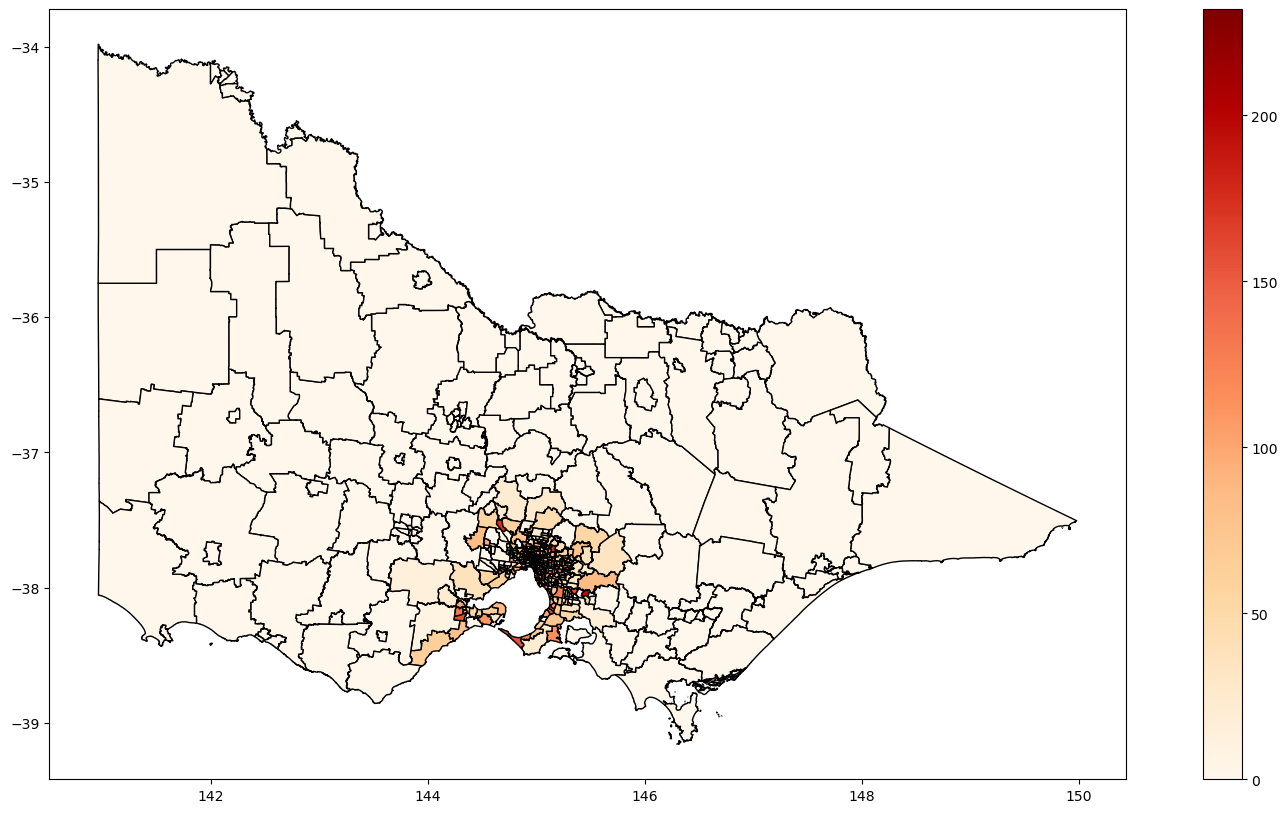

In [12]:
gdf.plot(column='VISTA_count', cmap='OrRd', edgecolor='k', legend=True, figsize=(20,10))